In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [6]:
m = 1000
d = 100
q = 1
active = fourier

ratio_train = 0.7

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [7]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [8]:
y = (1+np.linalg.norm(X, axis=-1))**(0.5)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [9]:
Ns = np.arange(1, 10201, 200)

In [10]:
%%time
results_dense_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_l2.append(res)

CPU times: user 46min 30s, sys: 41.7 s, total: 47min 11s
Wall time: 8min 3s


In [11]:
%%time
results_sparse_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q=1, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_l2.append(res)

CPU times: user 43min 35s, sys: 40.5 s, total: 44min 16s
Wall time: 7min 27s


In [12]:
%%time
results_dense_wl2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_wl2.append(res)

CPU times: user 1h 55min 39s, sys: 2min 25s, total: 1h 58min 5s
Wall time: 21min 4s


In [13]:
%%time
results_sparse_wl2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        D = make_D(W)
        c = min_wl2(A_train, y_train, D)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_wl2.append(res)

CPU times: user 1h 56min 3s, sys: 2min 16s, total: 1h 58min 19s
Wall time: 20min 49s


[0.15069477462460135, 0.22747485847147794, 0.3951388567636713, 0.2231675125765416, 0.20122793858459134, 0.18691455133281548, 0.17815762724745202, 0.1704484747632768, 0.1706830661543004, 0.1661330384217429, 0.16509873397545718, 0.16274556814387003, 0.16255297531467663, 0.16292276812742607, 0.16171260892371428, 0.15767396895486305, 0.1592812808438886, 0.15802800754061969, 0.1571147836017106, 0.160494983917085, 0.15483536037611775, 0.1568979932969805, 0.15506362425337722, 0.1566789139998265, 0.1559740529071149, 0.15795511189856298, 0.15517982724006296, 0.15643108419465748, 0.1530327880521462, 0.15463889448339524, 0.1539072534572496, 0.15742304887040637, 0.1553489548636004, 0.15463736481622625, 0.15451698619285525, 0.15352681580569852, 0.15456070784112586, 0.1541528412718353, 0.15450416559945418, 0.15506625207051009, 0.1538556774959809, 0.15322959572008654, 0.15471062163374158, 0.15328701749984922, 0.15367192411209454, 0.15385995930589091, 0.15265172863028434, 0.1520835482476476, 0.1544330

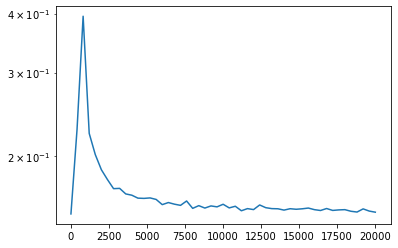

In [22]:
print([np.mean(res) for res in results_dense_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2])

[0.03164078644099077, 0.0015067712675263076, 0.005117075140003751, 0.0016230628062060889, 0.0011755761473864795, 0.0012963795693187365, 0.0010374350962910797, 0.0010922732516717056, 0.0009970096191572262, 0.0010362268599179967, 0.0010885029985368707, 0.001026107634601012, 0.0010374117196795434, 0.0009958362324154872, 0.000939070669918454, 0.0009433297003322806, 0.0010126855808940652, 0.0009790242242088032, 0.000970958244927264, 0.0010099355408638312, 0.0009762296746737862, 0.0009941257565667123, 0.001000000719253913, 0.0009279277715387033, 0.0009647227843858411, 0.0010137744370219018, 0.0009412441135693312, 0.0009738929281043633, 0.0009804391148789586, 0.0010061928675006765, 0.0009965374851920467, 0.0009198719757833541, 0.0009171550203042146, 0.0008575550565569761, 0.0009839644887941403, 0.001045131868474706, 0.0009869460055972055, 0.0009280457611811584, 0.0009799924499452734, 0.00102748786310878, 0.000988302130164325, 0.0009574093330427166, 0.000983592116585383, 0.000983742533953825, 

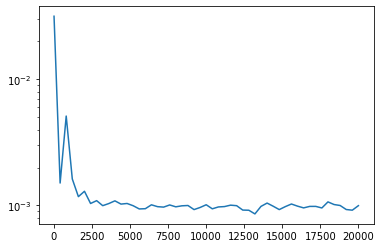

In [23]:
print([np.mean(res) for res in results_sparse_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2])

[0.15063379617498074, 0.2212876994139918, 0.4750143215492013, 0.26160455267499333, 0.23297839294659162, 0.21290045196252985, 0.19844069573038675, 0.19540138505458468, 0.18390926510408562, 0.18301313424863813, 0.18172605367841518, 0.1782434024435631, 0.17681771697788673, 0.17076016925705068, 0.1706831777159457, 0.16931945672144827, 0.17520811552687113, 0.16734865469977173, 0.16944633250302057, 0.16641436787231106, 0.1684505901827454, 0.16714577555755, 0.16745971466517698, 0.16475565695360955, 0.16309904227055264, 0.16304950826960257, 0.1668632475309555, 0.16477020391031327, 0.1619105267964474, 0.16244780799881978, 0.16187725065810704, 0.1610682462375994, 0.16462859566748106, 0.16140175780885194, 0.16245272367054311, 0.15964540806617822, 0.15971144019323166, 0.16214499104985663, 0.1601817845835755, 0.1599229319113609, 0.1611069707254762, 0.15988967163353035, 0.16324334468479212, 0.157709275758245, 0.15911972918498682, 0.1593581077234392, 0.15829938907340532, 0.1597573240225663, 0.1593586

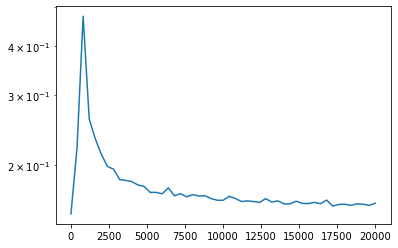

In [24]:
print([np.mean(res) for res in results_dense_wl2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2])

[0.014794190645194234, 0.002686842890891774, 0.0026958257748870658, 0.0025245391289199313, 0.0025338520288242365, 0.002555196295044343, 0.002466417242505641, 0.0025435305218965967, 0.00247051841436815, 0.002726303166064104, 0.002617833506192712, 0.002779829374584706, 0.0025705025080892657, 0.0027370412706443125, 0.0026480609144752592, 0.002750134462842343, 0.0027580263013430683, 0.002563343267101688, 0.002679473282212315, 0.002607083695640007, 0.0027833449228077552, 0.002701781457642001, 0.002617493135567173, 0.0027990926491222095, 0.002648974098050745, 0.0027120624820948748, 0.0025063673130611953, 0.002775423440847288, 0.002665961618810867, 0.0027901337443758745, 0.002520001189341446, 0.002676849173068801, 0.0025841627668223496, 0.0026708872431181374, 0.0027615364491509254, 0.0026789674992470625, 0.0028228823893038076, 0.0027150807617688515, 0.0028077044738348766, 0.002793326938933343, 0.0027156121513337026, 0.0026816270189504833, 0.0027823832369799862, 0.0027651852044061364, 0.002812

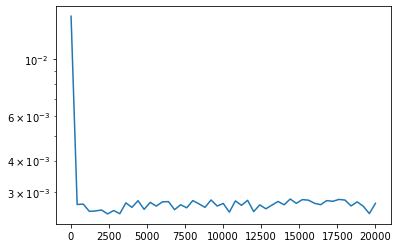

In [25]:
print([np.mean(res) for res in results_sparse_wl2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2])

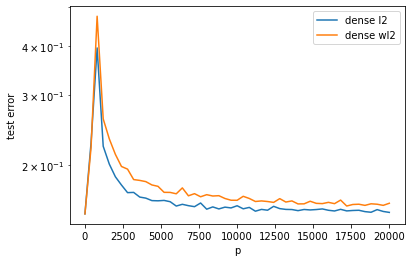

In [26]:
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

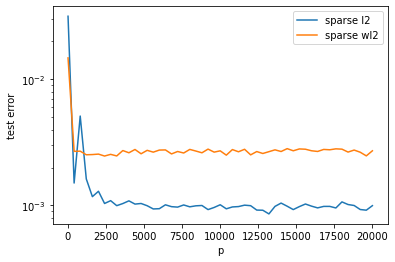

In [27]:
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()

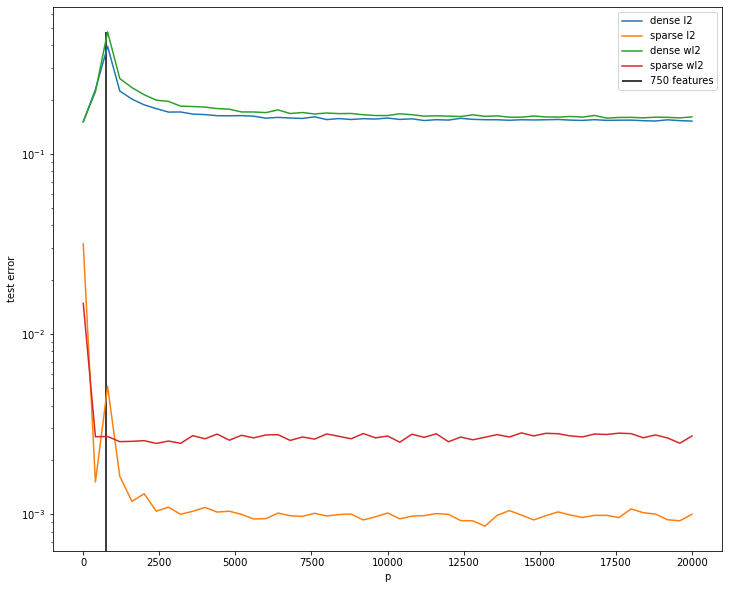

In [30]:
plt.figure(figsize=(12, 10))
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_wl2], label="dense wl2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_wl2], label="sparse wl2")
plt.vlines(750, ymin=0, ymax=max([np.mean(res) for res in results_dense_wl2]), color="black", label="750 features")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()